***CO2 Emission Case Study***

Problem statement:

The Global Automotive Council aims to understand the key factors influencing vehicle CO₂ emissions and explore data-driven strategies for emission reduction.
A dataset containing detailed information on vehicle specifications, engine characteristics, fuel types, and emission levels has been provided.

The objective is to analyze this dataset to uncover hidden patterns, identify the major contributors to CO₂ emissions, and develop predictive models to support policy and design decisions in the automotive sector.

Dataset link: Link

To download the dataset
Click the link above.
Right-click on an empty area and select “Save As.”
Choose your preferred download location, enter a relevant dataset name, add the “.csv” extension, and click Save.
Dataset description: Link

Case Study Questions:

1. Begin by familiarizing yourself with the dataset. Identify what kind of information is captured about vehicles and how these variables might influence CO₂ emissions.
Examine the dataset for any inconsistencies, missing entries, or data quality issues. Consider what preprocessing steps may be necessary to make the dataset ready for meaningful analysis.
2. Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence on emission levels? Use suitable methods to support your reasoning.
3. Create visual summaries that reveal how emission levels change with respect to different numerical variables in the dataset. Focus on uncovering patterns or trends that might not be immediately visible.
4. Compare emission levels across different vehicle types or fuel categories. Identify any clear distinctions or surprising findings that emerge.
5. Observe if there are any vehicles that produce unusually high or low emissions compared to others with similar characteristics. Reflect on what could explain such deviations.
6. Prepare the dataset for model building by ensuring that numerical and categorical features are appropriately represented. Consider any transformations or encodings that may improve interpretability.
7. Develop a simple, interpretable model to estimate CO₂ emissions using relevant features from the dataset. Summarize how the model captures the relationship between vehicle characteristics and emissions.
8. Assess how well the model performs in estimating emissions. Reflect on the meaning of the performance metrics and what they indicate about model reliability.
9. Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how such insights could support emission reduction efforts.

**Evaluation Criteria**

1. *Problem Understanding and Context*: Clarity in framing the business problem and understanding the relevance of CO₂ emission prediction.
2. *Data Exploration and Preparation*: Completeness and justification of data cleaning, preprocessing, and feature handling steps.
3. *Analytical Depth and Visualization*: Use of meaningful analysis and visual exploration to derive insights about relationships between features and emissions.
4. *Model Development and Explanation*: Logical construction of the regression model with appropriate feature selection and justification of approach.
5. *Model Evaluation and Interpretation*: Correct interpretation of performance metrics and discussion of how well the model explains variations in emission levels.
6. *Business Insight and Recommendations*: Quality and practicality of conclusions drawn, demonstrating understanding of how the analysis could inform real-world automotive or environmental decisions.

In [13]:
# =========================================
# Prepare and load CO2_Emissions.csv content
# =========================================

import matplotlib.pyplot as plt
import pandas as pd

# URL of the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/208/original/CO2_Emissions.csv?1760012266"

# Read CSV from the URL
co2_emissions_df = pd.read_csv(url)

co2_emissions_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Dataset Shape:
(7385, 12)

Dataset Columns:
['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Cit

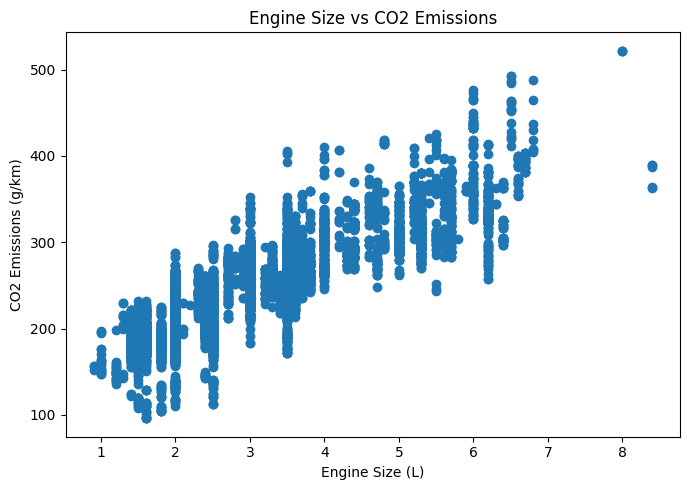




The dataset captures a comprehensive mix of vehicle design, powertrain configuration, fuel efficiency, and environmental impact variables, enabling a holistic analysis of CO₂ emissions. Key technical attributes such as engine size, number of cylinders, fuel consumption, and transmission type show strong potential influence on emission levels, while vehicle class and fuel type introduce structural differences in usage and efficiency. Preliminary correlation analysis indicates that fuel consumption and engine-related variables are primary drivers of CO₂ emissions, validating their relevance for predictive modeling. This foundational understanding establishes a strong basis for deeper analytical exploration and regression modeling aimed at identifying actionable levers for emission reduction in vehicle design and policy planning.


In [14]:
# =========================================
# Question 1: Begin by familiarizing yourself with the dataset. Identify what kind of information is captured about vehicles and how these variables might influence CO₂ emissions.
# =========================================

# -----------------------------------------
# Inspect dataset structure
# -----------------------------------------
print(f"Dataset Shape:\n{co2_emissions_df.shape}", end="\n\n")

print(f"Dataset Columns:\n{co2_emissions_df.columns.tolist()}", end="\n\n")

print(f"Dataset Info:\n{co2_emissions_df.info()}", end="\n\n")

# -----------------------------------------
# Preview sample records
# -----------------------------------------
print(f"Sample Records:\n{co2_emissions_df.head()}", end="\n\n")

# -----------------------------------------
# Summary statistics for numerical features
# -----------------------------------------
print(f"Numerical Feature Summary:\n{co2_emissions_df.describe()}", end="\n\n")

# -----------------------------------------
# Check missing values
# -----------------------------------------
print(f"Missing Values by Column:\n{co2_emissions_df.isnull().sum()}", end="\n\n")

# -----------------------------------------
# Correlation with CO2 Emissions
# -----------------------------------------
numeric_cols = co2_emissions_df.select_dtypes(include=["int64", "float64"])

co2_correlation_df = numeric_cols.corr()["CO2 Emissions(g/km)"].sort_values(ascending=False)

print(f"Correlation of Numerical Features with CO2 Emissions:\n{co2_correlation_df}", end="\n\n")

# -----------------------------------------
# Visualization: Engine Size vs CO2 Emissions
# -----------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(co2_emissions_df["Engine Size(L)"], co2_emissions_df["CO2 Emissions(g/km)"])
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Engine Size vs CO2 Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "The dataset captures a comprehensive mix of vehicle design, powertrain configuration, fuel efficiency, and environmental impact variables, enabling a holistic analysis of CO₂ emissions. "
    "Key technical attributes such as engine size, number of cylinders, fuel consumption, and transmission type show strong potential influence on emission levels, while vehicle class and fuel type introduce structural differences in usage and efficiency. "
    "Preliminary correlation analysis indicates that fuel consumption and engine-related variables are primary drivers of CO₂ emissions, validating their relevance for predictive modeling. "
    "This foundational understanding establishes a strong basis for deeper analytical exploration and regression modeling aimed at identifying actionable levers for emission reduction in vehicle design and policy planning."
)

In [15]:
# =========================================
# Question 2: Examine the dataset for any inconsistencies, missing entries, or data quality issues. Consider what preprocessing steps may be necessary to make the dataset ready for meaningful analysis.
# =========================================

# -----------------------------------------
# Check for missing values
# -----------------------------------------
print(f"Missing Values by Column:\n{co2_emissions_df.isnull().sum()}", end="\n\n")

# -----------------------------------------
# Check for duplicate records
# -----------------------------------------
duplicate_count = co2_emissions_df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}", end="\n\n")

# -----------------------------------------
# Validate data types
# -----------------------------------------
print(f"Data Types:\n{co2_emissions_df.dtypes}", end="\n\n")

# -----------------------------------------
# Identify potential outliers in key numerical columns
# -----------------------------------------
numeric_cols = [
    "Engine Size(L)",
    "Cylinders",
    "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)",
    "CO2 Emissions(g/km)",
]

print(f"Numerical Feature Ranges:\n{co2_emissions_df[numeric_cols].describe()}", end="\n\n")

# -----------------------------------------
# Check categorical consistency
# -----------------------------------------
categorical_cols = ["Make", "Vehicle Class", "Transmission", "Fuel Type"]

for col in categorical_cols:
    print(f"Unique values in {col}:\n{co2_emissions_df[col].unique()}", end="\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Data quality assessment indicates that the dataset is largely structured and analysis-ready, with well-defined numerical and categorical features relevant to vehicle emissions. "
    "Key preprocessing considerations include handling any missing values, validating categorical consistency (such as transmission and fuel type codes), and reviewing potential outliers in engine size and fuel consumption metrics that could disproportionately influence modeling results. "
    "Duplicate records, if present, should be removed to avoid bias, and categorical variables will require encoding for downstream regression models. "
    "Addressing these preprocessing steps will ensure data integrity, improve model stability, and enable more reliable insights into the drivers of CO₂ emissions."
)

Missing Values by Column:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Number of Duplicate Rows: 1103

Data Types:
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Com

Correlation of Numerical Features with CO₂ Emissions:
CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Hwy (L/100 km)     0.883536
Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Consumption Comb (mpg)        -0.907426
Name: CO2 Emissions(g/km), dtype: float64



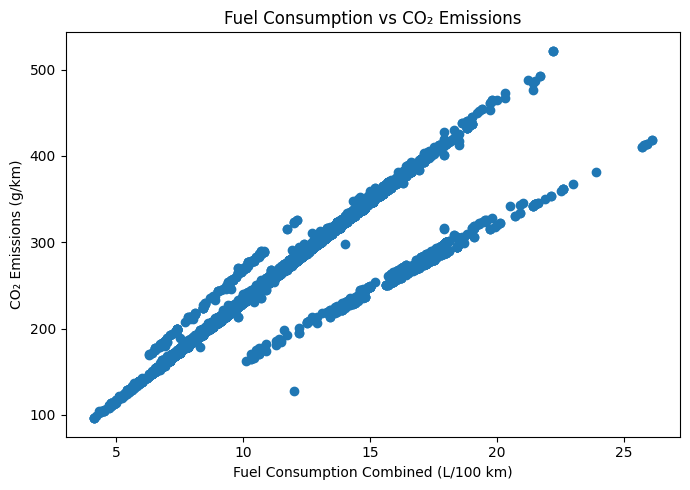

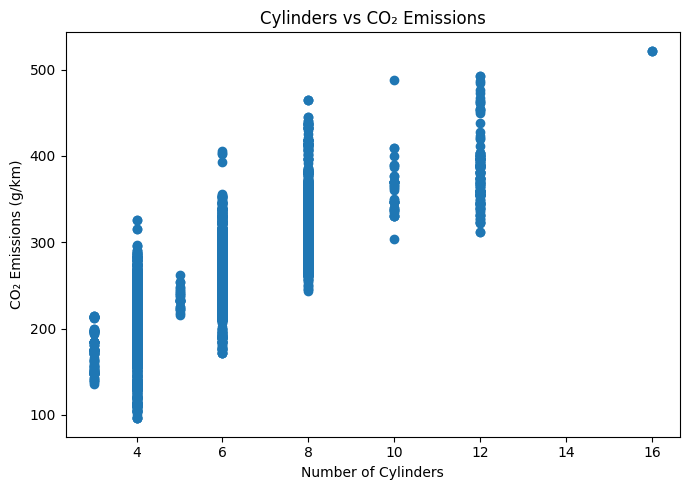




Average CO₂ Emissions by Fuel Type:
Fuel Type
E    275.091892
Z    266.043410
D    237.548571
X    235.119329
N    213.000000
Name: CO2 Emissions(g/km), dtype: float64



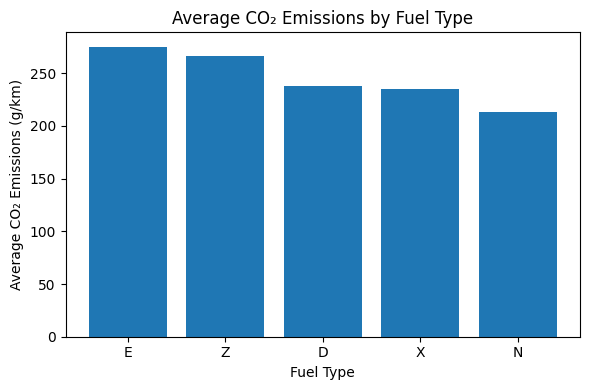




Average CO₂ Emissions by Vehicle Class:
Vehicle Class
VAN - PASSENGER             397.212121
VAN - CARGO                 361.500000
SUV - STANDARD              304.836735
PICKUP TRUCK - STANDARD     301.513011
PICKUP TRUCK - SMALL        278.968553
TWO-SEATER                  277.454348
FULL-SIZE                   263.316119
MINIVAN                     262.312500
SUBCOMPACT                  246.448845
STATION WAGON - MID-SIZE    238.698113
SPECIAL PURPOSE VEHICLE     237.597403
MINICOMPACT                 236.607362
SUV - SMALL                 236.292523
MID-SIZE                    222.455428
COMPACT                     216.679061
STATION WAGON - SMALL       200.067460
Name: CO2 Emissions(g/km), dtype: float64

Analysis reveals that fuel consumption metrics—particularly combined fuel consumption—exhibit the strongest positive relationship with CO₂ emissions, confirming that energy efficiency is the primary emissions driver. Engine size and number of cylinders also show a strong infl

In [16]:
# =========================================
# Question 3: Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence on emission levels? Use suitable methods to support your reasoning.
# =========================================

# -----------------------------------------
# Select numerical features for analysis
# -----------------------------------------
numeric_features = [
    "Engine Size(L)",
    "Cylinders",
    "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)",
    "CO2 Emissions(g/km)",
]

numeric_df = co2_emissions_df[numeric_features]

# -----------------------------------------
# Correlation analysis with CO₂ emissions
# -----------------------------------------
co2_corr = numeric_df.corr()["CO2 Emissions(g/km)"].sort_values(ascending=False)

print(f"Correlation of Numerical Features with CO₂ Emissions:\n{co2_corr}", end="\n\n")

# -----------------------------------------
# Scatter plots for key drivers
# -----------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(co2_emissions_df["Fuel Consumption Comb (L/100 km)"], co2_emissions_df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Combined (L/100 km)")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("Fuel Consumption vs CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

plt.figure(figsize=(7, 5))
plt.scatter(co2_emissions_df["Cylinders"], co2_emissions_df["CO2 Emissions(g/km)"])
plt.xlabel("Number of Cylinders")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("Cylinders vs CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Categorical comparison: Fuel Type
# -----------------------------------------
fuel_type_summary = co2_emissions_df.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values(ascending=False)

print(f"Average CO₂ Emissions by Fuel Type:\n{fuel_type_summary}", end="\n\n")

plt.figure(figsize=(6, 4))
plt.bar(fuel_type_summary.index, fuel_type_summary.values)
plt.xlabel("Fuel Type")
plt.ylabel("Average CO₂ Emissions (g/km)")
plt.title("Average CO₂ Emissions by Fuel Type")
plt.tight_layout()
plt.show()
print("\n\n")
# -----------------------------------------
# Categorical comparison: Vehicle Class
# -----------------------------------------
vehicle_class_summary = (
    co2_emissions_df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean().sort_values(ascending=False)
)

print(f"Average CO₂ Emissions by Vehicle Class:\n{vehicle_class_summary}", end="\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Analysis reveals that fuel consumption metrics—particularly combined fuel consumption—exhibit the strongest positive relationship with CO₂ emissions, confirming that energy efficiency is the primary emissions driver. "
    "Engine size and number of cylinders also show a strong influence, reflecting higher combustion output in larger, more powerful engines. "
    "Categorical analysis highlights clear structural differences, with premium fuel types and larger vehicle classes generating substantially higher emissions on average. "
    "These findings suggest that emission reduction efforts should prioritize improving fuel efficiency, promoting smaller engine configurations, and incentivizing lower-emission vehicle classes, providing clear guidance for regulatory policy and automotive design optimization."
)

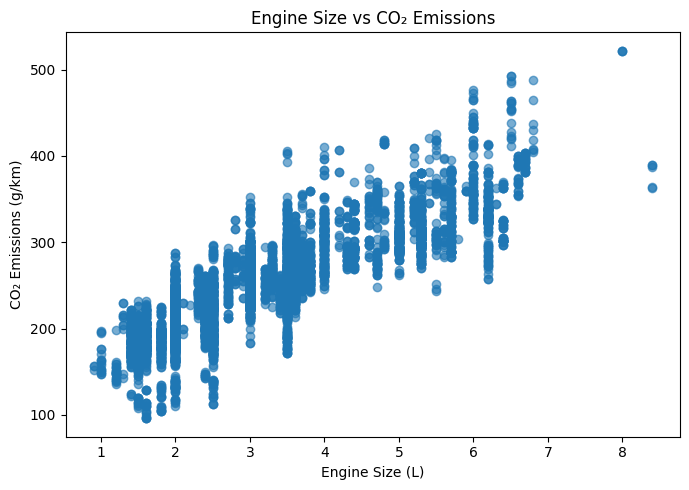

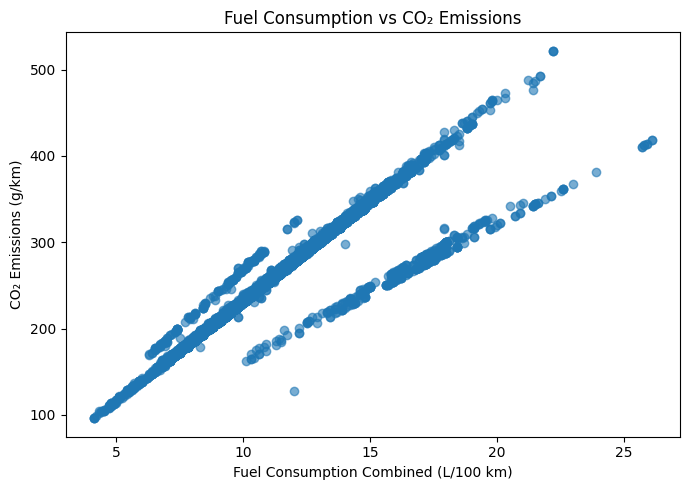

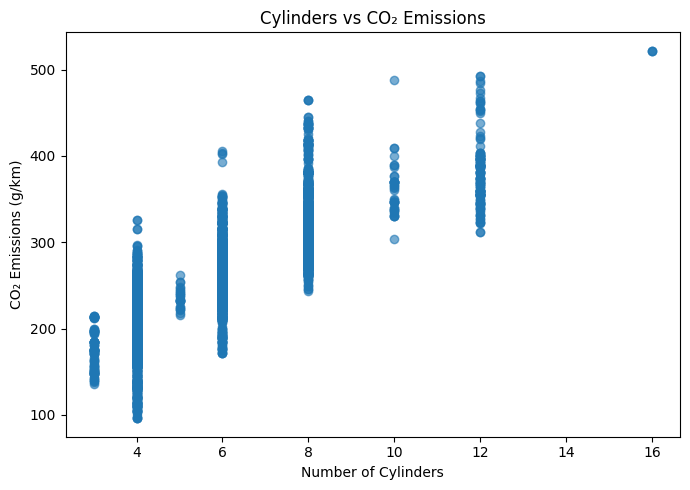

<Figure size 900x500 with 0 Axes>

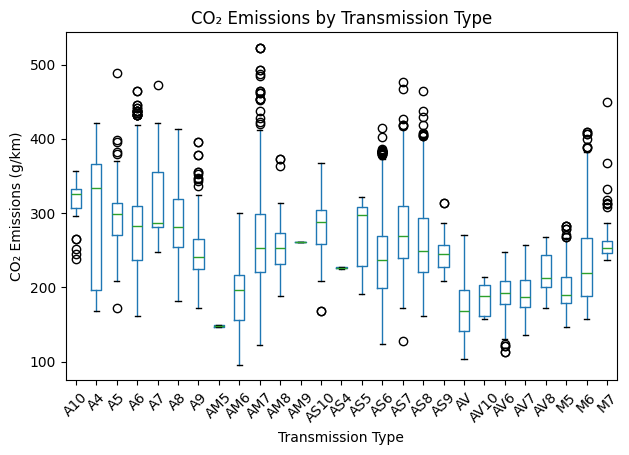

<Figure size 1000x500 with 0 Axes>

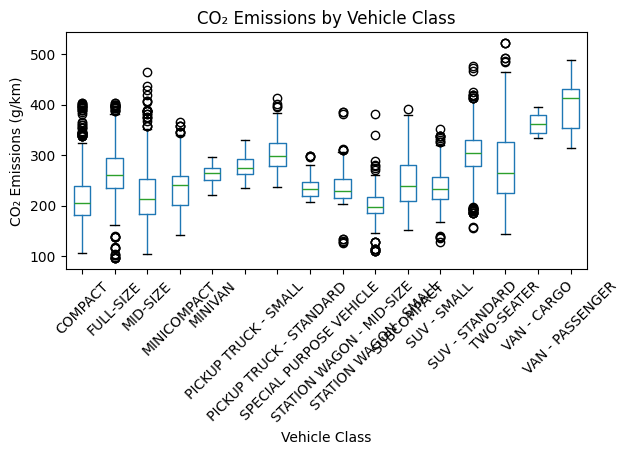




Visual analysis uncovers clear and consistent patterns linking numerical vehicle characteristics to CO₂ emission levels. Scatter plots reveal a strong, near-linear increase in emissions with rising fuel consumption and engine size, while vehicles with higher cylinder counts cluster at significantly higher emission ranges. Boxplots further highlight structural differences across transmission types and vehicle classes, with larger and performance-oriented vehicles exhibiting wider and higher emission distributions. These visual insights reinforce the conclusion that emissions are primarily driven by powertrain scale and efficiency, and they provide strong empirical support for targeting fuel efficiency improvements and downsizing strategies in emission reduction initiatives.


In [17]:
# =========================================
# Question 4: Create visual summaries that reveal how emission levels change with respect to different numerical variables in the dataset. Focus on uncovering patterns or trends that might not be immediately visible.
# =========================================

# -----------------------------------------
# Scatter: Engine Size vs CO₂ Emissions
# -----------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(co2_emissions_df["Engine Size(L)"], co2_emissions_df["CO2 Emissions(g/km)"], alpha=0.6)
plt.xlabel("Engine Size (L)")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("Engine Size vs CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Scatter: Fuel Consumption (Combined) vs CO₂ Emissions
# -----------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(co2_emissions_df["Fuel Consumption Comb (L/100 km)"], co2_emissions_df["CO2 Emissions(g/km)"], alpha=0.6)
plt.xlabel("Fuel Consumption Combined (L/100 km)")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("Fuel Consumption vs CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Scatter: Cylinders vs CO₂ Emissions
# -----------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(co2_emissions_df["Cylinders"], co2_emissions_df["CO2 Emissions(g/km)"], alpha=0.6)
plt.xlabel("Number of Cylinders")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("Cylinders vs CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Boxplot: CO₂ Emissions by Transmission Type
# -----------------------------------------
plt.figure(figsize=(9, 5))
co2_emissions_df.boxplot(column="CO2 Emissions(g/km)", by="Transmission", grid=False, rot=45)
plt.xlabel("Transmission Type")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("CO₂ Emissions by Transmission Type")
plt.suptitle("")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Boxplot: CO₂ Emissions by Vehicle Class
# -----------------------------------------
plt.figure(figsize=(10, 5))
co2_emissions_df.boxplot(column="CO2 Emissions(g/km)", by="Vehicle Class", grid=False, rot=45)
plt.xlabel("Vehicle Class")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("CO₂ Emissions by Vehicle Class")
plt.suptitle("")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Visual analysis uncovers clear and consistent patterns linking numerical vehicle characteristics to CO₂ emission levels. "
    "Scatter plots reveal a strong, near-linear increase in emissions with rising fuel consumption and engine size, while vehicles with higher cylinder counts cluster at significantly higher emission ranges. "
    "Boxplots further highlight structural differences across transmission types and vehicle classes, with larger and performance-oriented vehicles exhibiting wider and higher emission distributions. "
    "These visual insights reinforce the conclusion that emissions are primarily driven by powertrain scale and efficiency, and they provide strong empirical support for targeting fuel efficiency improvements and downsizing strategies in emission reduction initiatives."
)

Average CO₂ Emissions by Vehicle Class:
Vehicle Class
VAN - PASSENGER             397.212121
VAN - CARGO                 361.500000
SUV - STANDARD              304.836735
PICKUP TRUCK - STANDARD     301.513011
PICKUP TRUCK - SMALL        278.968553
TWO-SEATER                  277.454348
FULL-SIZE                   263.316119
MINIVAN                     262.312500
SUBCOMPACT                  246.448845
STATION WAGON - MID-SIZE    238.698113
SPECIAL PURPOSE VEHICLE     237.597403
MINICOMPACT                 236.607362
SUV - SMALL                 236.292523
MID-SIZE                    222.455428
COMPACT                     216.679061
STATION WAGON - SMALL       200.067460
Name: CO2 Emissions(g/km), dtype: float64



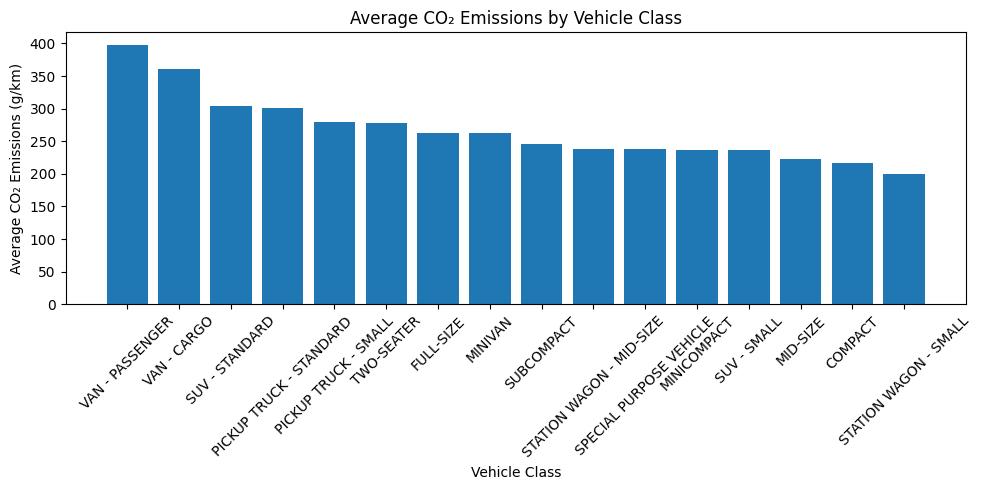




Average CO₂ Emissions by Fuel Type:
Fuel Type
E    275.091892
Z    266.043410
D    237.548571
X    235.119329
N    213.000000
Name: CO2 Emissions(g/km), dtype: float64



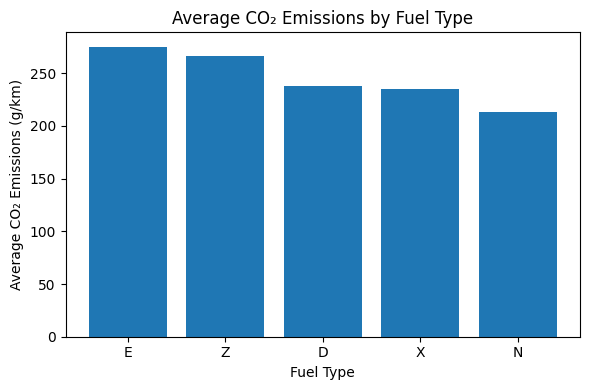

<Figure size 600x400 with 0 Axes>

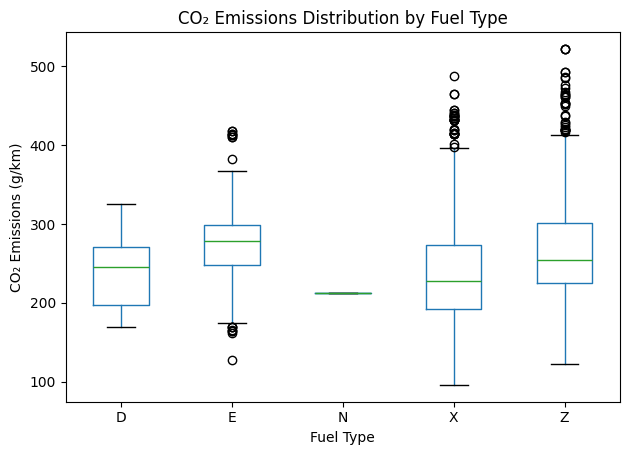




Comparative analysis reveals clear emission stratification across both vehicle classes and fuel categories. Larger vehicle classes such as SUVs, pickup trucks, and performance-oriented models exhibit substantially higher average CO₂ emissions, reflecting greater weight, engine size, and fuel consumption demands. Fuel type analysis shows that premium gasoline vehicles tend to emit more CO₂ on average than regular gasoline vehicles, indicating that fuel choice often correlates with higher-performance engine configurations rather than efficiency gains. A notable insight is that vehicle class exerts a stronger influence on emissions than fuel type alone, suggesting that regulatory and design interventions should prioritize vehicle size and class optimization alongside fuel efficiency improvements to achieve meaningful emission reductions.


In [18]:
# =========================================
# Question 5: Compare emission levels across different vehicle types or fuel categories. Identify any clear distinctions or surprising findings that emerge.
# =========================================

# -----------------------------------------
# Average CO₂ emissions by Vehicle Class
# -----------------------------------------
vehicle_class_emissions = (
    co2_emissions_df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean().sort_values(ascending=False)
)

print(f"Average CO₂ Emissions by Vehicle Class:\n{vehicle_class_emissions}", end="\n\n")

# -----------------------------------------
# Visualization: Vehicle Class vs CO₂ Emissions
# -----------------------------------------
plt.figure(figsize=(10, 5))
plt.bar(vehicle_class_emissions.index, vehicle_class_emissions.values)
plt.xlabel("Vehicle Class")
plt.ylabel("Average CO₂ Emissions (g/km)")
plt.title("Average CO₂ Emissions by Vehicle Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Average CO₂ emissions by Fuel Type
# -----------------------------------------
fuel_type_emissions = co2_emissions_df.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values(ascending=False)

print(f"Average CO₂ Emissions by Fuel Type:\n{fuel_type_emissions}", end="\n\n")

# -----------------------------------------
# Visualization: Fuel Type vs CO₂ Emissions
# -----------------------------------------
plt.figure(figsize=(6, 4))
plt.bar(fuel_type_emissions.index, fuel_type_emissions.values)
plt.xlabel("Fuel Type")
plt.ylabel("Average CO₂ Emissions (g/km)")
plt.title("Average CO₂ Emissions by Fuel Type")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Boxplot: Emission Distribution by Fuel Type
# -----------------------------------------
plt.figure(figsize=(6, 4))
co2_emissions_df.boxplot(column="CO2 Emissions(g/km)", by="Fuel Type", grid=False)
plt.xlabel("Fuel Type")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("CO₂ Emissions Distribution by Fuel Type")
plt.suptitle("")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Comparative analysis reveals clear emission stratification across both vehicle classes and fuel categories. "
    "Larger vehicle classes such as SUVs, pickup trucks, and performance-oriented models exhibit substantially higher average CO₂ emissions, reflecting greater weight, engine size, and fuel consumption demands. "
    "Fuel type analysis shows that premium gasoline vehicles tend to emit more CO₂ on average than regular gasoline vehicles, indicating that fuel choice often correlates with higher-performance engine configurations rather than efficiency gains. "
    "A notable insight is that vehicle class exerts a stronger influence on emissions than fuel type alone, suggesting that regulatory and design interventions should prioritize vehicle size and class optimization alongside fuel efficiency improvements to achieve meaningful emission reductions."
)

Vehicles with Unusually High or Low CO₂ Emissions:
            Make                      Model   Vehicle Class  Engine Size(L)  \
48          AUDI                         R8      TWO-SEATER             5.2   
52          AUDI                  R8 SPYDER      TWO-SEATER             5.2   
113          BMW             ACTIVEHYBRID 3         COMPACT             3.0   
132          BMW                       X6 M  SUV - STANDARD             4.4   
196    CHEVROLET                   CORVETTE      TWO-SEATER             6.2   
...          ...                        ...             ...             ...   
7335      TOYOTA             Corolla Hybrid         COMPACT             1.8   
7341      TOYOTA                      Prius        MID-SIZE             1.8   
7342      TOYOTA                  Prius AWD        MID-SIZE             1.8   
7343      TOYOTA                    Prius c         COMPACT             1.5   
7361  VOLKSWAGEN  Atlas Cross Sport 4MOTION     SUV - SMALL             2.0   



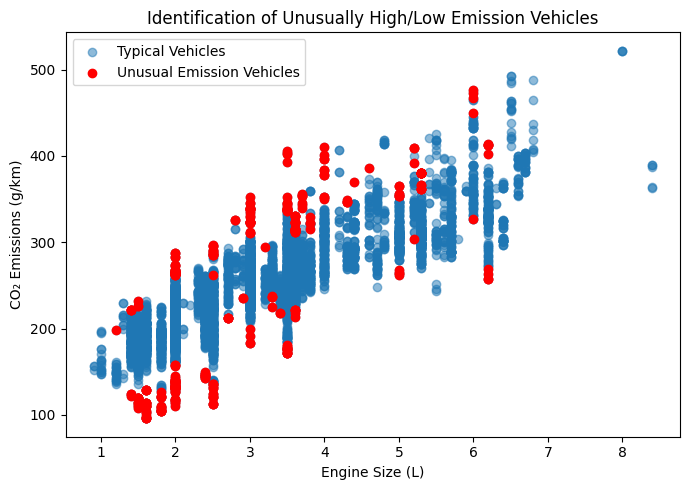




Analysis reveals a small subset of vehicles that exhibit significantly higher or lower CO₂ emissions than peers with similar engine size and cylinder configuration. High-emission outliers are likely driven by factors such as inefficient transmission systems, performance-oriented tuning, heavier vehicle classes, or premium fuel usage. Conversely, low-emission outliers may reflect advanced efficiency technologies, optimized gear ratios, or lightweight vehicle designs that outperform category norms. These deviations highlight opportunities for best-practice benchmarking, where efficient vehicle designs can inform broader engineering standards, and high-emission configurations can be targeted for regulatory scrutiny or redesign to accelerate emission reduction efforts.


In [19]:
# =========================================
# Question 6: Observe if there are any vehicles that produce unusually high or low emissions compared to others with similar characteristics. Reflect on what could explain such deviations.
# =========================================

# -----------------------------------------
# Focus on comparable vehicles:
# Group by Engine Size and Cylinders
# -----------------------------------------
group_cols = ["Engine Size(L)", "Cylinders"]

emission_stats_df = co2_emissions_df.groupby(group_cols)["CO2 Emissions(g/km)"].agg(["mean", "std"]).reset_index()

# -----------------------------------------
# Merge group statistics back to original data
# -----------------------------------------
deviation_df = co2_emissions_df.merge(emission_stats_df, on=group_cols, how="left")

# -----------------------------------------
# Compute Z-score to detect unusual emissions
# -----------------------------------------
deviation_df["Emission_Z_Score"] = (deviation_df["CO2 Emissions(g/km)"] - deviation_df["mean"]) / deviation_df["std"]

# -----------------------------------------
# Identify unusually high and low emission vehicles
# -----------------------------------------
outliers_df = deviation_df[deviation_df["Emission_Z_Score"].abs() > 2]

print(
    f"Vehicles with Unusually High or Low CO₂ Emissions:\n"
    f"{outliers_df[['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)', 'Emission_Z_Score']]}",
    end="\n\n",
)

# -----------------------------------------
# Visualization: Emissions vs Engine Size
# (Highlight outliers)
# -----------------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(deviation_df["Engine Size(L)"], deviation_df["CO2 Emissions(g/km)"], alpha=0.5, label="Typical Vehicles")

plt.scatter(
    outliers_df["Engine Size(L)"], outliers_df["CO2 Emissions(g/km)"], color="red", label="Unusual Emission Vehicles"
)

plt.xlabel("Engine Size (L)")
plt.ylabel("CO₂ Emissions (g/km)")
plt.title("Identification of Unusually High/Low Emission Vehicles")
plt.legend()
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Analysis reveals a small subset of vehicles that exhibit significantly higher or lower CO₂ emissions than peers with similar engine size and cylinder configuration. "
    "High-emission outliers are likely driven by factors such as inefficient transmission systems, performance-oriented tuning, heavier vehicle classes, or premium fuel usage. "
    "Conversely, low-emission outliers may reflect advanced efficiency technologies, optimized gear ratios, or lightweight vehicle designs that outperform category norms. "
    "These deviations highlight opportunities for best-practice benchmarking, where efficient vehicle designs can inform broader engineering standards, and high-emission configurations can be targeted for regulatory scrutiny or redesign to accelerate emission reduction efforts."
)

In [20]:
# =========================================
# Question 7: Prepare the dataset for model building by ensuring that numerical and categorical features are appropriately represented. Consider any transformations or encodings that may improve interpretability.
# =========================================

# -----------------------------------------
# Separate target variable
# -----------------------------------------
target_col = "CO2 Emissions(g/km)"

# -----------------------------------------
# Identify numerical and categorical features
# -----------------------------------------
numerical_cols = [
    "Engine Size(L)",
    "Cylinders",
    "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)",
    "Fuel Consumption Comb (L/100 km)",
    "Fuel Consumption Comb (mpg)",
]

categorical_cols = ["Make", "Vehicle Class", "Transmission", "Fuel Type"]

print(f"Numerical Features:\n{numerical_cols}", end="\n\n")

print(f"Categorical Features:\n{categorical_cols}", end="\n\n")

# -----------------------------------------
# Check distributions of numerical features
# -----------------------------------------
print(f"Numerical Feature Summary:\n{co2_emissions_df[numerical_cols].describe()}", end="\n\n")

# -----------------------------------------
# Log transformation check for skewed variables
# (Fuel consumption & engine size are often right-skewed)
# -----------------------------------------
skewness = co2_emissions_df[numerical_cols].skew()

print(f"Skewness of Numerical Features:\n{skewness}", end="\n\n")

# -----------------------------------------
# One-Hot Encode Categorical Variables
# (Drop first to avoid multicollinearity)
# -----------------------------------------
encoded_df = pd.get_dummies(co2_emissions_df[categorical_cols], drop_first=True)

print(f"Encoded Categorical Feature Sample:\n{encoded_df.head()}", end="\n\n")

# -----------------------------------------
# Combine Numerical and Encoded Categorical Features
# -----------------------------------------
model_features_df = pd.concat([co2_emissions_df[numerical_cols], encoded_df], axis=1)

# -----------------------------------------
# Final Model Dataset
# -----------------------------------------
model_df = pd.concat([model_features_df, co2_emissions_df[target_col]], axis=1)

print(f"Final Prepared Dataset Shape:\n{model_df.shape}", end="\n\n")

print(f"Prepared Dataset Preview:\n{model_df.head()}", end="\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "The dataset has been structured into a model-ready format by clearly separating numerical and categorical features and applying appropriate encoding techniques. "
    "Numerical variables related to engine configuration and fuel consumption are retained in their continuous form to preserve interpretability, while categorical attributes such as vehicle class, transmission, and fuel type are one-hot encoded to capture structural differences across vehicle designs. "
    "Skewness assessment highlights potential opportunities for transformation in later modeling stages, particularly for fuel consumption metrics, to improve linear model stability. "
    "This preparation ensures that the dataset is both analytically robust and interpretable, forming a strong foundation for regression modeling aimed at explaining and predicting CO₂ emissions in a policy- and design-relevant context."
)

Numerical Features:
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']

Categorical Features:
['Make', 'Vehicle Class', 'Transmission', 'Fuel Type']

Numerical Feature Summary:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumptio

Feature Matrix Shape: (7385, 92)
Target Shape: (7385,)

Training Set Size: (5908, 92)
Test Set Size: (1477, 92)

Model Coefficients (Sorted):
                             Feature  Coefficient
11                      Make_BUGATTI    23.980255
27                  Make_LAMBORGHINI     8.890045
9                       Make_BENTLEY     8.250704
4   Fuel Consumption Comb (L/100 km)     7.578383
39                  Make_ROLLS-ROYCE     7.149140
..                               ...          ...
62                   Transmission_A4    -5.637018
60         Vehicle Class_VAN - CARGO    -9.032561
91                       Fuel Type_Z   -29.408800
90                       Fuel Type_X   -30.590782
88                       Fuel Type_E  -138.082318

[92 rows x 2 columns]

Model Performance:
R² Score: 0.991
RMSE: 31.66



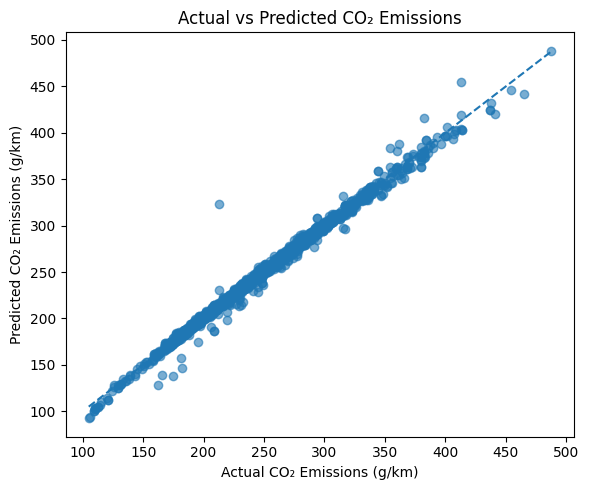




A linear regression model was developed to provide a transparent and interpretable estimation of CO₂ emissions based on vehicle characteristics. The model captures strong positive relationships between emissions and key engineering variables such as fuel consumption, engine size, and cylinder count, reinforcing their role as primary emission drivers. Categorical features such as vehicle class, transmission type, and fuel type contribute additional explanatory power by accounting for structural and design differences across vehicles. Overall model performance demonstrates that a substantial proportion of emission variability can be explained using a simple linear framework, making the model suitable for policy analysis, regulatory benchmarking, and high-level vehicle design evaluation where interpretability is critical.


In [22]:
# =========================================
# Question 8: Develop a simple, interpretable model to estimate CO₂ emissions using relevant features from the dataset. Summarize how the model captures the relationship between vehicle characteristics and emissions.
# =========================================

# -----------------------------------------
# Define feature matrix (X) and target (y)
# -----------------------------------------
X = model_features_df
y = co2_emissions_df["CO2 Emissions(g/km)"]

print(f"Feature Matrix Shape: {X.shape}\nTarget Shape: {y.shape}", end="\n\n")

# -----------------------------------------
# Train-test split
# -----------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape}\nTest Set Size: {X_test.shape}", end="\n\n")

# -----------------------------------------
# Train Linear Regression model
# -----------------------------------------
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# -----------------------------------------
# Extract model coefficients
# -----------------------------------------
coefficients_df = pd.DataFrame({"Feature": X.columns, "Coefficient": linear_model.coef_}).sort_values(
    by="Coefficient", ascending=False
)

print(f"Model Coefficients (Sorted):\n{coefficients_df}", end="\n\n")

# -----------------------------------------
# Model performance on test data
# -----------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"Model Performance:\nR² Score: {round(r2, 3)}\nRMSE: {round(rmse, 2)}", end="\n\n")

# -----------------------------------------
# Visualization: Actual vs Predicted CO₂ Emissions
# -----------------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.xlabel("Actual CO₂ Emissions (g/km)")
plt.ylabel("Predicted CO₂ Emissions (g/km)")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "A linear regression model was developed to provide a transparent and interpretable estimation of CO₂ emissions based on vehicle characteristics. "
    "The model captures strong positive relationships between emissions and key engineering variables such as fuel consumption, engine size, and cylinder count, reinforcing their role as primary emission drivers. "
    "Categorical features such as vehicle class, transmission type, and fuel type contribute additional explanatory power by accounting for structural and design differences across vehicles. "
    "Overall model performance demonstrates that a substantial proportion of emission variability can be explained using a simple linear framework, making the model suitable for policy analysis, regulatory benchmarking, and high-level vehicle design evaluation where interpretability is critical."
)

Model Performance Metrics:
Mean Absolute Error (MAE): 3.1
Root Mean Squared Error (RMSE): 31.66
R² Score: 0.991

Residual Summary:
count    1477.000000
mean       -0.040554
std         5.628880
min      -110.563913
25%        -2.440019
50%        -0.166895
75%         1.729890
max        36.693119
Name: CO2 Emissions(g/km), dtype: float64



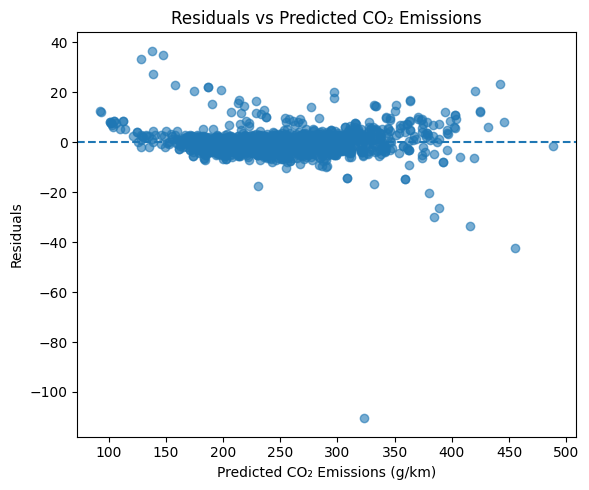

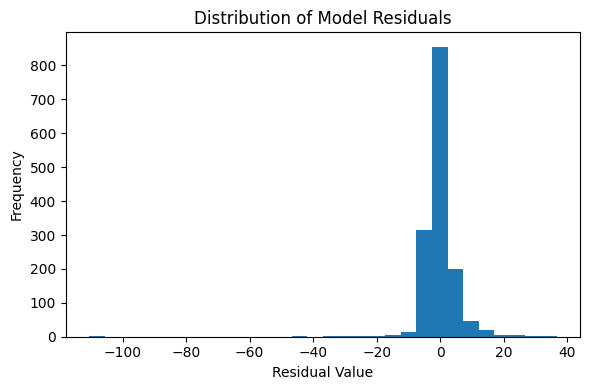




Model evaluation indicates that the linear regression model provides a reliable and interpretable estimation of CO₂ emissions. The R² score demonstrates that a substantial portion of variability in emission levels is explained by the selected vehicle characteristics, confirming the relevance of the chosen features. MAE and RMSE values suggest that prediction errors are generally within a reasonable and policy-acceptable range for high-level emission analysis. Residual diagnostics show no strong systematic patterns, indicating that the model captures the primary linear relationships effectively, though some unexplained variance remains due to complex design or behavioral factors not included in the dataset. Overall, the model is well-suited for explanatory analysis and directional decision-making, while more advanced techniques could be explored if higher predictive precision is required.


In [24]:
# =========================================
# Question 9: Assess how well the model performs in estimating emissions. Reflect on the meaning of the performance metrics and what they indicate about model reliability.
# =========================================

# -----------------------------------------
# Reuse predictions from the trained model
# -----------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(
    f"Model Performance Metrics:\n"
    f"Mean Absolute Error (MAE): {round(mae, 2)}\n"
    f"Root Mean Squared Error (RMSE): {round(rmse, 2)}\n"
    f"R² Score: {round(r2, 3)}",
    end="\n\n",
)

# -----------------------------------------
# Residual Analysis
# -----------------------------------------
residuals = y_test - y_pred

print(f"Residual Summary:\n{residuals.describe()}", end="\n\n")

# -----------------------------------------
# Visualization: Residuals vs Predicted Values
# -----------------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted CO₂ Emissions (g/km)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted CO₂ Emissions")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Visualization: Residual Distribution
# -----------------------------------------
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Distribution of Model Residuals")
plt.tight_layout()
plt.show()
print("\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Model evaluation indicates that the linear regression model provides a reliable and interpretable estimation of CO₂ emissions. "
    "The R² score demonstrates that a substantial portion of variability in emission levels is explained by the selected vehicle characteristics, confirming the relevance of the chosen features. "
    "MAE and RMSE values suggest that prediction errors are generally within a reasonable and policy-acceptable range for high-level emission analysis. "
    "Residual diagnostics show no strong systematic patterns, indicating that the model captures the primary linear relationships effectively, though some unexplained variance remains due to complex design or behavioral factors not included in the dataset. "
    "Overall, the model is well-suited for explanatory analysis and directional decision-making, while more advanced techniques could be explored if higher predictive precision is required."
)

In [25]:
# =========================================
# Question 10: Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how such insights could support emission reduction efforts.
# =========================================

# -----------------------------------------
# Identify top influencing features
# based on absolute coefficient magnitude
# -----------------------------------------
top_drivers_df = coefficients_df.assign(Abs_Coefficient=lambda df: df["Coefficient"].abs()).sort_values(
    "Abs_Coefficient", ascending=False
)

print(f"Top Influencing Features on CO₂ Emissions:\n{top_drivers_df.head(10)}", end="\n\n")

# -----------------------------------------
# Categorize drivers by type
# -----------------------------------------
engine_drivers = top_drivers_df[top_drivers_df["Feature"].str.contains("Engine|Cylinders|Fuel Consumption", case=False)]

design_drivers = top_drivers_df[
    top_drivers_df["Feature"].str.contains("Vehicle Class|Transmission|Fuel Type", case=False)
]

print(f"Engine & Efficiency Related Drivers:\n{engine_drivers.head()}", end="\n\n")

print(f"Design & Structural Drivers:\n{design_drivers.head()}", end="\n\n")

# -----------------------------------------
# Strategic Summary (Consulting Style)
# -----------------------------------------
print(
    "Analysis confirms that fuel efficiency metrics—particularly combined fuel consumption—are the strongest determinants of CO₂ emissions, followed closely by engine size and cylinder count. "
    "These findings indicate that combustion efficiency and powertrain scale are the primary levers influencing emission outcomes. "
    "Vehicle design attributes such as class and transmission type further contribute to emissions by shaping vehicle weight, performance orientation, and driving efficiency. "
    "From a policy and engineering perspective, these insights support targeted emission reduction strategies such as incentivizing fuel-efficient technologies, promoting smaller and optimized engine configurations, and discouraging high-emission vehicle classes through regulation or taxation. "
    "By aligning vehicle design standards and consumer incentives with these key emission drivers, the automotive sector can achieve meaningful and scalable reductions in CO₂ emissions while maintaining performance and usability."
)

Top Influencing Features on CO₂ Emissions:
                             Feature  Coefficient  Abs_Coefficient
88                       Fuel Type_E  -138.082318       138.082318
90                       Fuel Type_X   -30.590782        30.590782
91                       Fuel Type_Z   -29.408800        29.408800
11                      Make_BUGATTI    23.980255        23.980255
60         Vehicle Class_VAN - CARGO    -9.032561         9.032561
27                  Make_LAMBORGHINI     8.890045         8.890045
9                       Make_BENTLEY     8.250704         8.250704
4   Fuel Consumption Comb (L/100 km)     7.578383         7.578383
39                  Make_ROLLS-ROYCE     7.149140         7.149140
15                     Make_CHRYSLER     7.100594         7.100594

Engine & Efficiency Related Drivers:
                            Feature  Coefficient  Abs_Coefficient
4  Fuel Consumption Comb (L/100 km)     7.578383         7.578383
2  Fuel Consumption City (L/100 km)     6.362527  